# Analyzing background data
This file is for analyzing the background data:
- app names
- requested permissions 
- granted permissions
- app type (user or system)
- target SDK
- usage time (optional-not all participants)
<div class="alert alert-block alert-warning">**In the DB connection (first cell) specifiy the path for your LOCAL file with two lines , first line for user name, and second line for password.** </div>

In [1]:
#data base connection
import csv
import pandas
from sshtunnel import SSHTunnelForwarder
import pymysql

#specifiy the path for your file
with open('/Users/QN/Desktop/THIRD crowdperm/user.txt') as f:
    lines = f.read().splitlines()    
f.close()


server =    SSHTunnelForwarder(
         ('juhu.soic.indiana.edu'),
         ssh_username=lines[0],
         ssh_password=lines[1],
         remote_bind_address=('127.0.0.1', 3306))
server.start()
cnx = pymysql.connect(host='127.0.0.1',
                           port=server.local_bind_port,
                           user='mturk',
                           passwd='m+turk=my-sql',
                           db='mturk')
cnx.set_charset('utf8')  
cursor = cnx.cursor()

### Usage time analysis:

test the hypothesis "Most frequently used apps are less restricted"
In other words: the higher the usage time, the higher the number of granted permissions"



In [2]:
#prepare usage time data


query = ("select a.* , b.`usagetime` from permissions a , usageTime b where a.`TurkerID`=b.`TurkerID` and a.`appName`=b.`appName` order by b.TurkerID, b.usageTime")

cursor.execute(query)

with open('out.csv','w') as out:
    myFields = ['TurkerID', 'randomint', 'appName', 'appType', 'targetSDK', 'requestedPerms', 'grantedPerms', 'usagetime','number of permissions requested','number of permissions granted']
    writer = csv.DictWriter(out, fieldnames=myFields)
    writer.writeheader()
    for row in cursor:
        rPerm = row[6].strip('[]')
        gPerm = row[7].strip('[]')
        writer.writerow({'TurkerID':row[1], 'randomint':row[2], 'appName':row[3], 'appType':row[4], 'targetSDK':row[5], 'requestedPerms':row[6], 'grantedPerms':row[7], 'usagetime':row[8],'number of permissions requested':len(rPerm.split()),'number of permissions granted':len(gPerm.split())})



        
        
dfUsage = pandas.read_csv('out.csv',sep=',')
        
cursor.close()
#cnx.close()

In [3]:
dfUsage.head()

,TurkerID,randomint,appName,appType,targetSDK,requestedPerms,grantedPerms,usagetime,number of permissions requested,number of permissions granted
0,A002160837SWJFPIAI7L,87492,My Files,system,24,[STORAGE],[STORAGE],1,1,1
1,A002160837SWJFPIAI7L,87492,Apps Survey,user,23,[],[],2,0,0
2,A002160837SWJFPIAI7L,87492,Google Play Music,system,26,"[LOCATION, STORAGE, CONTACTS]",[STORAGE],3,3,1
3,A002160837SWJFPIAI7L,87492,Amazon Kindle,system,24,"[STORAGE, CONTACTS, PHONE]",[],5,3,0
4,A002160837SWJFPIAI7L,87492,UberEATS,user,25,"[LOCATION, PHONE, CAMERA, STORAGE, CONTACTS, SMS]",[LOCATION],7,6,1


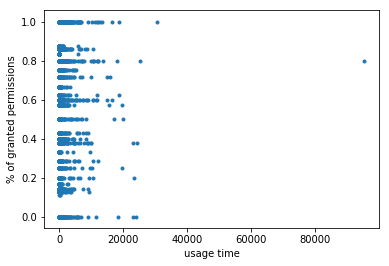

In [4]:
#test the hypothesis "Most frequently used apps are less restricted"
#In other words: the higher the usage time, the higher the number of granted permissions"
#stat analysis
from scipy import stats
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#help(pearsonr)

#read usage time file into a dataframe
usagedata=dfUsage

#try again with another filter
#skip the rows with zero requested permissions
usagedata=usagedata[usagedata['number of permissions requested'] > 4]
x=usagedata['usagetime']
y=usagedata['number of permissions granted']/usagedata['number of permissions requested']
#spearmanr(x,y)
pearsonr(x, y)


#plot the usagetime vs. %of granted permissions
import matplotlib.pyplot as plt
import numpy as np
#x=np.log(x)
plt.scatter(x/60,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
#plt.xscale('log')
#plt.plot(x,y)
#plt.plot(y)
plt.show()

In [8]:
pearsonr(x, y)
#spearmanr(x,y)

SpearmanrResult(correlation=0.083891138494214965, pvalue=3.9409721862268437e-09)

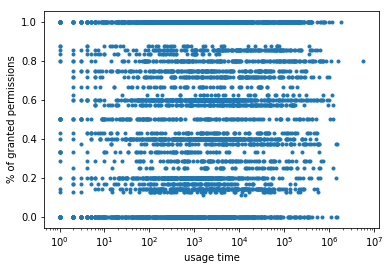

In [6]:
plt.xscale('log')
plt.scatter(x,y,marker='.')
plt.xlabel('usage time')
plt.ylabel('% of granted permissions')
plt.show()

In [7]:
#close DB connection
cnx.close()